# Income Predictor
In this project, I will create a classification model to predict whether a person makes over $50k a year


### Import Libraries and dataset

I will import `numpy`, `pandas` and `matplotlib` for working with the dataset. Next, I will use `sklearn` for using Machine Learning models. Finally, I'll import the dataset.

In [1]:
# Working with data
import numpy as np
import pandas as pd

# Visualizations
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
%matplotlib inline

# Ignore warnings
import warnings
warnings.filterwarnings('ignore');

Next, I will import the dataset.

In [2]:
columns = ['Age', 'Work Class', 'Final Weight', 'Education', 'Education Number', 'Marital Status', 'Occupation','Relationship', 'Race', 'Sex', 'Capital Gain', 'Capital Loss', 'Hours per Week', 'Country', 'Income']
dataset = pd.read_csv('./adult.csv', names = columns)

let's convert the target column into numerical classes.

In [3]:
from sklearn.preprocessing import LabelEncoder

labelEncoder = LabelEncoder()
dataset['Income'] = labelEncoder.fit_transform(dataset['Income'])

## Exploratory Data Analysis and Data Processing

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               32561 non-null  int64 
 1   Work Class        32561 non-null  object
 2   Final Weight      32561 non-null  int64 
 3   Education         32561 non-null  object
 4   Education Number  32561 non-null  int64 
 5   Marital Status    32561 non-null  object
 6   Occupation        32561 non-null  object
 7   Relationship      32561 non-null  object
 8   Race              32561 non-null  object
 9   Sex               32561 non-null  object
 10  Capital Gain      32561 non-null  int64 
 11  Capital Loss      32561 non-null  int64 
 12  Hours per Week    32561 non-null  int64 
 13  Country           32561 non-null  object
 14  Income            32561 non-null  int32 
dtypes: int32(1), int64(6), object(8)
memory usage: 3.6+ MB


The information above reveals that there are no missing values in the datatset.

rcParams['figure.figsize'] = 20, 12
dataset[['Age', 'Final Weight', 'Education Number', 'Capital Gain', 'Capital Loss', 'Hours per Week']].hist()

From the above histogrms infer the following:
1. **Age** column can be grouped into bins.
2. For **Capital Gain**, **Final Weight** and **Capital Loss** the data is highly left skewed which needs to be tackled.
3. The **Hours per Week** can also be split into bins.

### Age

Here, I'll bucket the age into separate bins.
1. 0-25: Young
2. 25-50: Adult
3. 50-100: Old

<AxesSubplot:xlabel='Age', ylabel='count'>

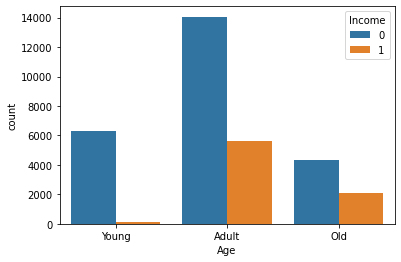

In [5]:
dataset['Age'] = pd.cut(dataset['Age'], bins = [0, 25, 50, 100], labels = ['Young', 'Adult', 'Old'])
sns.countplot(x = 'Age', hue = 'Income', data = dataset)

It appears that there are relatively less `Young` people who have an income more than $50K.

### Capital Gain and Capital Loss
Differance between the `Capital Gain` and `Capital Loss` looks more relevant and gives the change

<AxesSubplot:xlabel='Capital Diff', ylabel='count'>

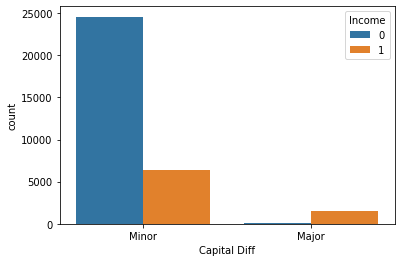

In [6]:
dataset['Capital Diff'] = dataset['Capital Gain'] - dataset['Capital Loss']
dataset.drop(['Capital Gain'], axis = 1, inplace = True)
dataset.drop(['Capital Loss'], axis = 1, inplace = True)

dataset['Capital Diff'] = pd.cut(dataset['Capital Diff'], bins = [-5000, 5000, 100000], labels = ['Minor', 'Major'])
sns.countplot(x = 'Capital Diff', hue = 'Income', data = dataset)

### Final Weight
As seen above, there is no correlation between Income and Final Weight, so I will drop this column.

In [7]:
dataset.drop(['Final Weight'], axis = 1, inplace = True)

### Hours per Week

<AxesSubplot:xlabel='Hours per Week', ylabel='count'>

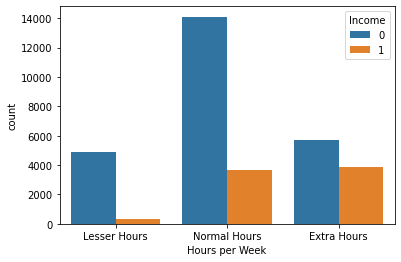

In [8]:
dataset['Hours per Week'] = pd.cut(dataset['Hours per Week'], bins = [0, 30, 40, 100], labels = ['Lesser Hours', 'Normal Hours', 'Extra Hours'])
sns.countplot(x = 'Hours per Week', hue = 'Income', data = dataset)

### Work Class

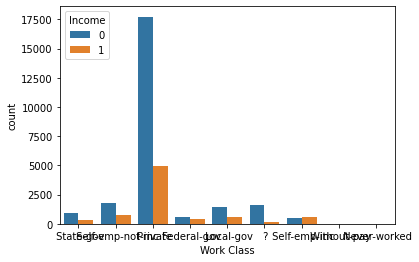

In [9]:
sns.countplot(x = 'Work Class', hue = 'Income', data = dataset)
dataset = dataset.drop(dataset[dataset['Work Class'] == ' ?'].index)
dataset = dataset.drop(dataset[dataset['Work Class'] == ' Without-pay'].index)
dataset = dataset.drop(dataset[dataset['Work Class'] == ' Never-worked'].index)

### Education and Education Number
checking if there is any relation between Education and Education Number.

For  Bachelors, the Education Number is [13]
For  HS-grad, the Education Number is [9]
For  11th, the Education Number is [7]
For  Masters, the Education Number is [14]
For  9th, the Education Number is [5]
For  Some-college, the Education Number is [10]
For  Assoc-acdm, the Education Number is [12]
For  Assoc-voc, the Education Number is [11]
For  7th-8th, the Education Number is [4]
For  Doctorate, the Education Number is [16]
For  Prof-school, the Education Number is [15]
For  5th-6th, the Education Number is [3]
For  10th, the Education Number is [6]
For  Preschool, the Education Number is [1]
For  12th, the Education Number is [8]
For  1st-4th, the Education Number is [2]


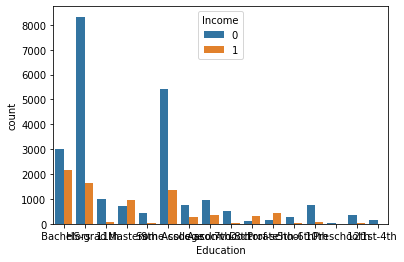

In [10]:
sns.countplot(x = 'Education', hue = 'Income', data = dataset)
education_classes = dataset['Education'].unique()
for edu_class in education_classes:
    print("For {}, the Education Number is {}" .format(edu_class, dataset[dataset['Education'] == edu_class]['Education Number'].unique()))

In [11]:
dataset.drop(['Education Number'], axis = 1, inplace = True)
dataset['Education'].replace([' 11th', ' 9th', ' 7th-8th', ' 5th-6th', ' 10th', ' 1st-4th', ' Preschool', ' 12th'],
                            ' School', inplace = True)
dataset['Education'].value_counts()

 HS-grad         9959
 Some-college    6772
 Bachelors       5182
 School          3820
 Masters         1675
 Assoc-voc       1321
 Assoc-acdm      1019
 Prof-school      558
 Doctorate        398
Name: Education, dtype: int64

### Marital Status and Relationship

In [12]:
dataset['Marital Status'].value_counts()

 Married-civ-spouse       14331
 Never-married             9908
 Divorced                  4258
 Separated                  959
 Widowed                    839
 Married-spouse-absent      388
 Married-AF-spouse           21
Name: Marital Status, dtype: int64

In [13]:
dataset['Relationship'].value_counts()

 Husband           12700
 Not-in-family      7865
 Own-child          4520
 Unmarried          3269
 Wife               1432
 Other-relative      918
Name: Relationship, dtype: int64

### Occupation

<AxesSubplot:xlabel='Occupation', ylabel='count'>

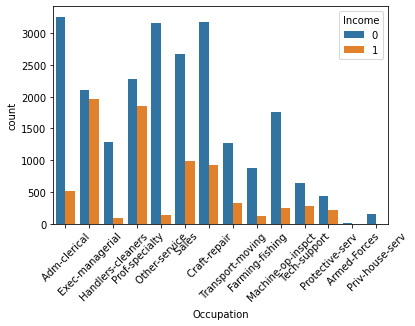

In [14]:
plt.xticks(rotation = 45)
sns.countplot(x = 'Occupation', hue = 'Income', data = dataset)

### Race

<AxesSubplot:xlabel='Race', ylabel='count'>

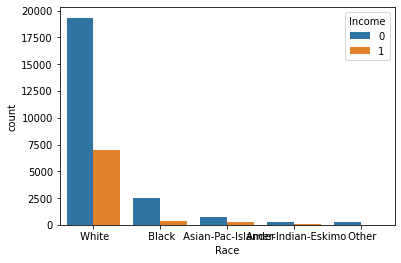

In [15]:
sns.countplot(x = 'Race', hue = 'Income', data = dataset)

In [16]:
dataset['Race'].unique()
dataset['Race'].replace([' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo', ' Other'],' Other', inplace = True)

### Sex

<AxesSubplot:xlabel='Sex', ylabel='count'>

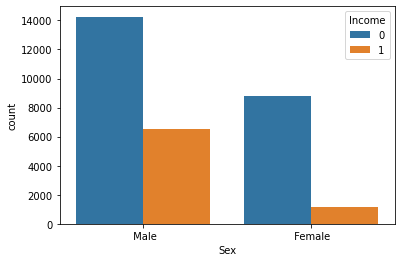

In [17]:
sns.countplot(x = 'Sex', hue = 'Income', data = dataset)

### Country

In [18]:
country_count = dataset['Country'].value_counts()
country_count

 United-States                 27491
 Mexico                          610
 ?                               556
 Philippines                     187
 Germany                         128
 Puerto-Rico                     109
 Canada                          107
 India                           100
 El-Salvador                     100
 Cuba                             92
 England                          86
 Jamaica                          80
 South                            71
 China                            68
 Italy                            68
 Dominican-Republic               67
 Vietnam                          64
 Guatemala                        63
 Japan                            59
 Poland                           56
 Columbia                         56
 Iran                             42
 Taiwan                           42
 Haiti                            42
 Portugal                         34
 Nicaragua                        33
 Peru                             30
 

Text(0.5, 1.0, 'Total adults from each Country')

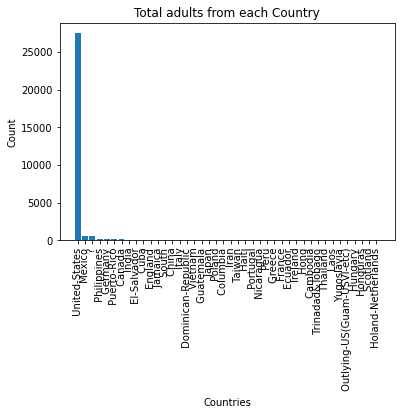

In [19]:
plt.bar(country_count.index, country_count.values)
plt.xticks(rotation = 90)
plt.xlabel('Countries')
plt.ylabel('Count')
plt.title('Total adults from each Country')

<AxesSubplot:xlabel='count', ylabel='Country'>

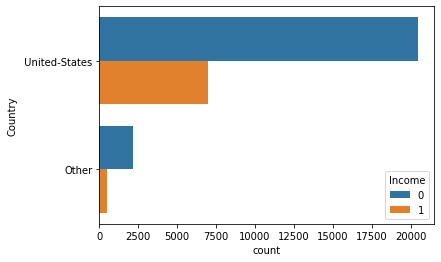

In [20]:
dataset = dataset.drop(dataset[dataset['Country'] == ' ?'].index)
countries = np.array(dataset['Country'].unique())
countries = np.delete(countries, 0)
dataset['Country'].replace(countries, 'Other', inplace = True)
sns.countplot(y = 'Country', hue = 'Income', data = dataset)

## Data Manipulation

In this subsection, I'll take all the remaining columns and create important numerical values out of them.

In [21]:
y = dataset['Income']
X = dataset.drop(['Income'], axis = 1)
X = pd.get_dummies(X)
print("Total features: {}".format(X.shape[1]))

Total features: 56


`train_test_split`

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

## Appyting Machine Learning

In [23]:
from sklearn.metrics import f1_score, accuracy_score, classification_report, confusion_matrix
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [24]:
classifiers = [ DecisionTreeClassifier(random_state = 0), 
                RandomForestClassifier(n_estimators = 100, random_state = 0),
                LogisticRegression(random_state = 0),
                KNeighborsClassifier(n_neighbors = 5),
                SVC(kernel = 'linear', probability = True)]
classifier_names = ["Decision Tree Classifier", 
                    "Random Forest Classifier",
                    "Logistic Regression",
                    "K-Nearest Neighbors",
                    "Support Vector Classifier"]
accuracies = []

Decision Tree Classifier:
F1 score: 0.61
Classification Report: 
               precision    recall  f1-score   support

           0       0.87      0.90      0.88      4539
           1       0.66      0.57      0.61      1491

    accuracy                           0.82      6030
   macro avg       0.76      0.74      0.75      6030
weighted avg       0.81      0.82      0.82      6030



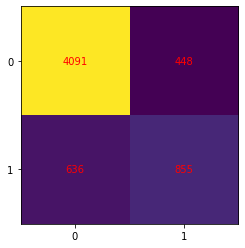

Random Forest Classifier:
F1 score: 0.64
Classification Report: 
               precision    recall  f1-score   support

           0       0.88      0.90      0.89      4539
           1       0.68      0.61      0.64      1491

    accuracy                           0.83      6030
   macro avg       0.78      0.76      0.77      6030
weighted avg       0.83      0.83      0.83      6030



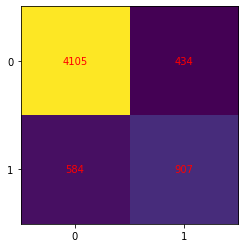

Logistic Regression:
F1 score: 0.64
Classification Report: 
               precision    recall  f1-score   support

           0       0.87      0.93      0.90      4539
           1       0.72      0.58      0.64      1491

    accuracy                           0.84      6030
   macro avg       0.80      0.75      0.77      6030
weighted avg       0.83      0.84      0.83      6030



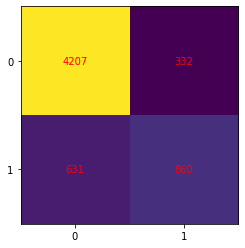

K-Nearest Neighbors:
F1 score: 0.61
Classification Report: 
               precision    recall  f1-score   support

           0       0.86      0.90      0.88      4539
           1       0.66      0.57      0.61      1491

    accuracy                           0.82      6030
   macro avg       0.76      0.74      0.75      6030
weighted avg       0.81      0.82      0.82      6030



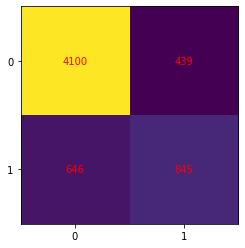

Support Vector Classifier:
F1 score: 0.62
Classification Report: 
               precision    recall  f1-score   support

           0       0.86      0.94      0.90      4539
           1       0.74      0.53      0.62      1491

    accuracy                           0.84      6030
   macro avg       0.80      0.73      0.76      6030
weighted avg       0.83      0.84      0.83      6030



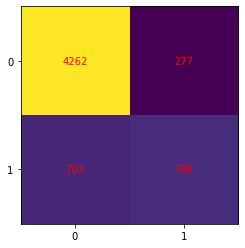

In [25]:
for i in range(len(classifiers)):
    classifier = classifiers[i]
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    print("{}:".format(classifier_names[i]))
    print("F1 score: {:.2f}".format(f1_score(y_test, y_pred)))
    print("Classification Report: \n", classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    fig, ax = plt.subplots(figsize=(4, 4))
    ax.imshow(cm)
    ax.grid(False)
    ax.xaxis.set(ticks=(0, 1), ticklabels=(0, 1))
    ax.yaxis.set(ticks=(0, 1), ticklabels=(0, 1))
    ax.set_ylim(1.5, -0.5)
    for i in range(2):
        for j in range(2):
            ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
    plt.show()
    accuracy = accuracy_score(y_test, y_pred)*100
    accuracies.append(accuracy)

    #show graph
    

### Accuracy Plot

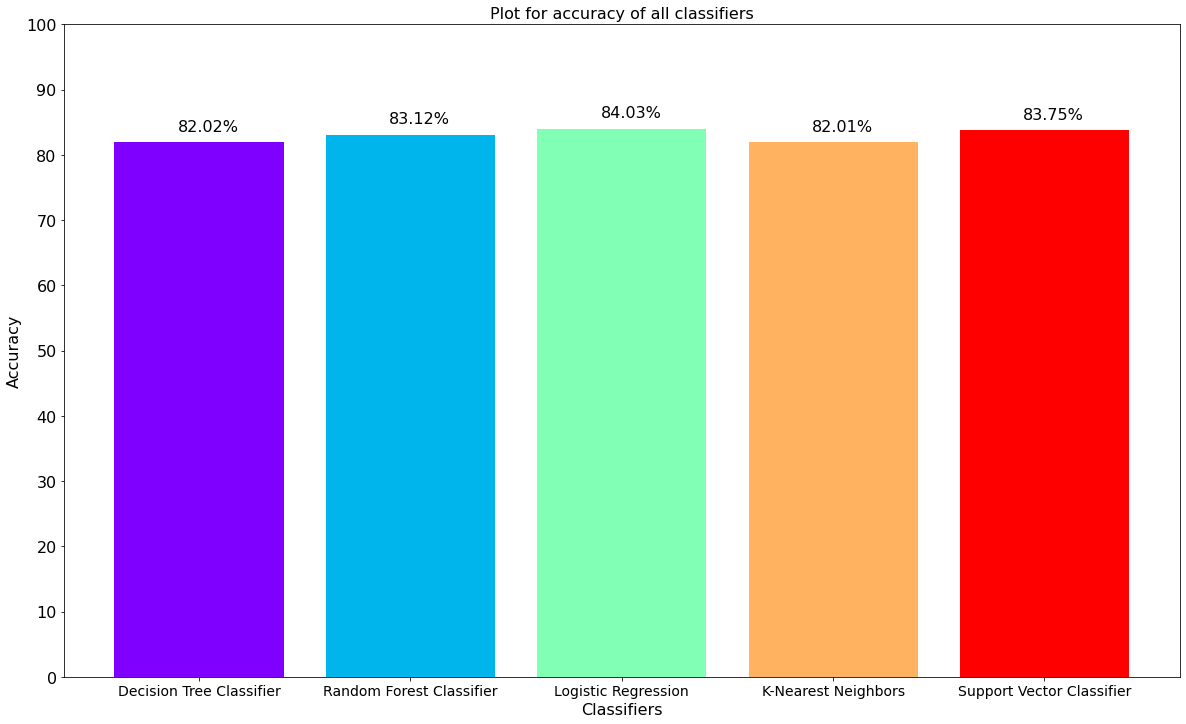

In [26]:
from matplotlib.cm import rainbow

plt.figure(figsize = (20, 12))
colors = rainbow(np.linspace(0, 1, len(classifiers)))
barplot = plt.bar(classifier_names, accuracies, color = colors)
plt.yticks([0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100], fontsize = 16)
plt.xticks(fontsize = 14)
plt.xlabel("Classifiers", fontsize = 16)
plt.ylabel("Accuracy", fontsize = 16)
plt.title("Plot for accuracy of all classifiers", fontsize = 16)
for i, bar in enumerate(barplot):
    plt.text(bar.get_x() + bar.get_width()/2 - 0.1, 
            bar.get_height()*1.02, 
            s = '{:.2f}%'.format(accuracies[i]), 
            fontsize = 16)

### ROC Curve

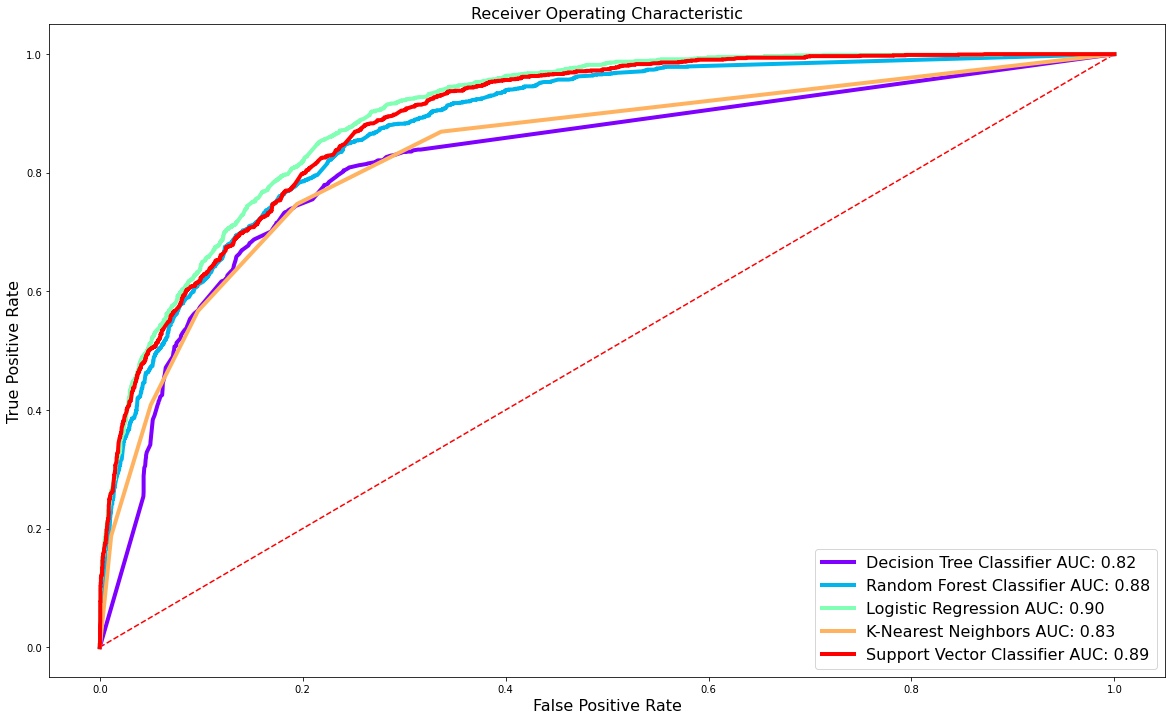

In [27]:
from sklearn.metrics import roc_curve, auc

plt.figure(figsize = (20, 12))
plt.plot([0,1], [0,1], 'r--')

for i in range(len(classifiers)):
    classifier = classifiers[i]
    probs = classifier.predict_proba(X_test)
    # Reading probability of second class
    probs = probs[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, probs)
    roc_auc = auc(fpr, tpr)
    label = classifier_names[i] + ' AUC:' + ' {0:.2f}'.format(roc_auc)
    plt.plot(fpr, tpr, c = colors[i], label = label, linewidth = 4)
    
plt.xlabel('False Positive Rate', fontsize = 16)
plt.ylabel('True Positive Rate', fontsize = 16)
plt.title('Receiver Operating Characteristic', fontsize = 16)
plt.legend(loc = 'lower right', fontsize = 16)


### Conclusion
The model with highest accuracy is `Logistic Regression`